## Step 1: Load and Visualize Data

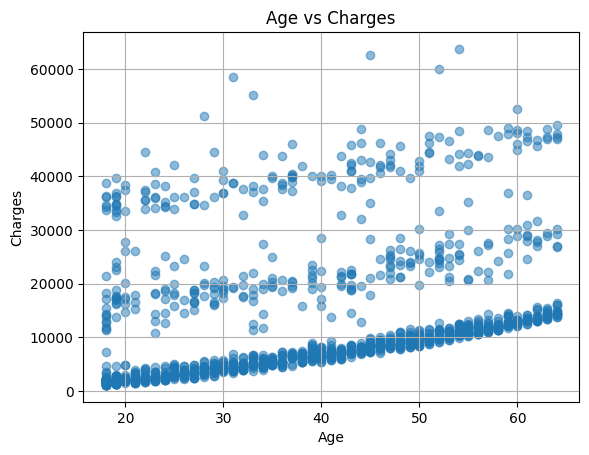

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/insurance.csv")
X = df['age'].values
y = df['charges'].values

plt.scatter(X, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.grid(True)
plt.show()

## Step 2: Define Cost Function (MSE)

In [2]:
import numpy as np

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def predict(X, w, b):
    return w * X + b

w, b = 0, 0
y_pred = predict(X, w, b)
mse = compute_mse(y, y_pred)
print(f"MSE with w=0 and b=0: {mse}")

MSE with w=0 and b=0: 322646873.5887047


## Step 3: Gradient Descent Function

In [3]:
def gradient_descent(X, y, lr=0.0001, epochs=300):
    n = len(X)
    w, b = 0.0, 0.0
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X + b
        error = y - y_pred
        mse = np.mean(error ** 2)
        loss_history.append(mse)

        dw = -(2/n) * np.dot(X, error)
        db = -(2/n) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, loss_history

w_final, b_final, losses = gradient_descent(X, y)

Epoch 0: MSE = 322646873.59, w = 114.2261, b = 2.6541
Epoch 10: MSE = 134612281.17, w = 326.0796, b = 8.1616
Epoch 20: MSE = 134574473.35, w = 329.0471, b = 8.9469
Epoch 30: MSE = 134573950.69, w = 329.0729, b = 9.6655
Epoch 40: MSE = 134573435.67, w = 329.0572, b = 10.3829
Epoch 50: MSE = 134572920.87, w = 329.0410, b = 11.1002
Epoch 60: MSE = 134572406.32, w = 329.0248, b = 11.8173
Epoch 70: MSE = 134571891.99, w = 329.0086, b = 12.5343
Epoch 80: MSE = 134571377.90, w = 328.9924, b = 13.2511
Epoch 90: MSE = 134570864.05, w = 328.9762, b = 13.9678
Epoch 100: MSE = 134570350.43, w = 328.9600, b = 14.6842
Epoch 110: MSE = 134569837.04, w = 328.9438, b = 15.4006
Epoch 120: MSE = 134569323.88, w = 328.9276, b = 16.1167
Epoch 130: MSE = 134568810.96, w = 328.9114, b = 16.8327
Epoch 140: MSE = 134568298.27, w = 328.8953, b = 17.5485
Epoch 150: MSE = 134567785.82, w = 328.8791, b = 18.2642
Epoch 160: MSE = 134567273.59, w = 328.8629, b = 18.9797
Epoch 170: MSE = 134566761.60, w = 328.8467, b

## Step 4: Plot Regression Line

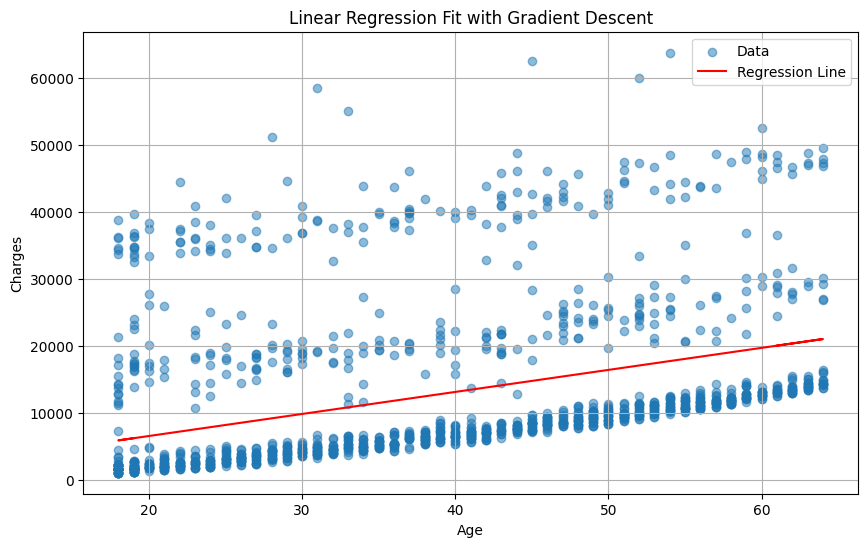

In [4]:
y_pred_final = w_final * X + b_final

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X, y_pred_final, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Fit with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Visualize Gradient Descent Curve (MSE vs Weight)

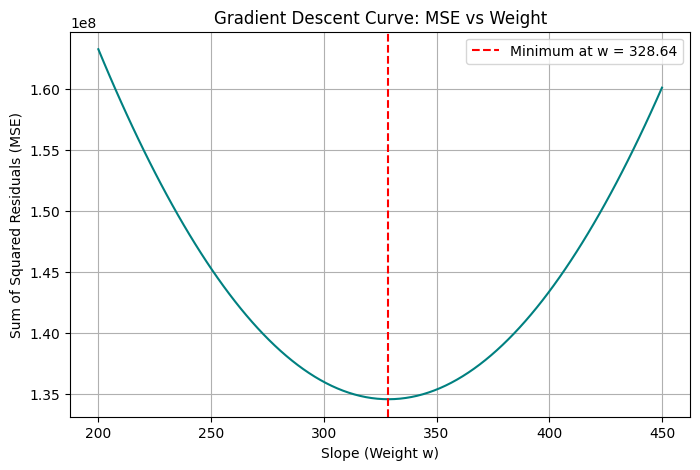

In [5]:
# Simulate loss curve (MSE vs slope w) while fixing bias
import numpy as np
import matplotlib.pyplot as plt

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

w_range = np.linspace(200, 450, 100)
b_fixed = b_final  # keep the bias constant
loss_curve = [compute_mse(y, w * X + b_fixed) for w in w_range]

# Plot the curve
plt.figure(figsize=(8, 5))
plt.plot(w_range, loss_curve, color='teal')
plt.xlabel('Slope (Weight w)')
plt.ylabel('Sum of Squared Residuals (MSE)')
plt.title('Gradient Descent Curve: MSE vs Weight')
plt.axvline(w_final, color='red', linestyle='--', label=f'Minimum at w = {w_final:.2f}')
plt.legend()
plt.grid(True)
plt.show()